Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


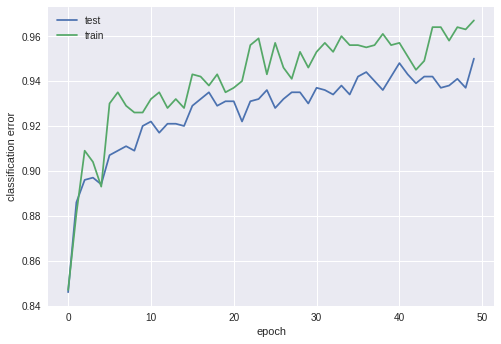

In [0]:
# %%time

import tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

# download mnist training data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)



a_0 = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

middle = 30
w_1 = tf.Variable(tf.truncated_normal([784, middle]))
b_1 = tf.Variable(tf.truncated_normal([1, middle]))
w_2 = tf.Variable(tf.truncated_normal([middle, 10]))
b_2 = tf.Variable(tf.truncated_normal([1, 10]))

final_e = tf.Variable(tf.truncated_normal([10, 10]))


def sigma(x):
    return tf.div(tf.constant(1.0),
                  tf.add(tf.constant(1.0), tf.exp(tf.negative(x))))
  
  
z_1 = tf.add(tf.matmul(a_0, w_1), b_1)
a_1 = sigma(z_1)
z_2 = tf.add(tf.matmul(a_1, w_2), b_2)
a_2 = sigma(z_2)


diff = tf.subtract(a_2, y)


def sigmaprime(x):
    return tf.multiply(sigma(x), tf.subtract(tf.constant(1.0), sigma(x)))
  
  
d_z_2 = tf.multiply(diff, sigmaprime(z_2))
d_b_2 = d_z_2
d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)
# final_e = d_z_2

d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
d_z_1 = tf.multiply(d_a_1, sigmaprime(z_1))
d_b_1 = d_z_1
d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)


eta = tf.constant(0.5)
step = [
    tf.assign(w_1,
            tf.subtract(w_1, tf.multiply(eta, d_w_1)))
  , tf.assign(b_1,
            tf.subtract(b_1, tf.multiply(eta,
                               tf.reduce_mean(d_b_1, axis=[0]))))
  , tf.assign(w_2,
            tf.subtract(w_2, tf.multiply(eta, d_w_2)))
  , tf.assign(b_2,
            tf.subtract(b_2, tf.multiply(eta,
                               tf.reduce_mean(d_b_2, axis=[0]))))
  , tf.assign(final_e, diff)
]


# loss functions 
acct_mat = tf.equal(tf.argmax(a_2, 1), tf.argmax(y, 1))
acct_res = tf.reduce_sum(tf.cast(acct_mat, tf.float32))


#initialize some variables
batch_size = 10
total_test_size = len(mnist.test.images)
epoch = range(50)
test_accuracy = []
train_accuracy = []

#start session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

### train the model
for j in epoch:

  for i in range(total_test_size//batch_size):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      sess.run(step, feed_dict = {a_0: batch_xs,
                                  y : batch_ys})
  ### test the accuracy 
  test_acc = sess.run(acct_res, feed_dict =
                          {a_0: mnist.test.images[:1000],
                           y : mnist.test.labels[:1000]})/1000
  train_acc = sess.run(acct_res, feed_dict =
                          {a_0: mnist.train.images[:1000],
                           y : mnist.train.labels[:1000]})/1000
  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  
#close the session  
# sess.close()
#plot 
plt.figure()
plt.plot(epoch,test_accuracy, label='test')
plt.plot(epoch,train_accuracy, label='train')
plt.xlabel('epoch')
plt.ylabel('classification error')
plt.legend()


        

In [0]:
# from google.colab import files
# # fucntion for to save weights to files
# weight_matrix = sess.run(w_2)
# for i in range(len(weight_matrix)):
#   filename = "file%s" % i
#   file = open("%s.txt" % filename, "w")
#   weight = weight_matrix[i]
#   for j in range(len(weight)):
#     file.write(str(weight[j])+'\n')
#   file.close()
#   download = files.download("%s.txt" % filename)



In [0]:
from tempfile import TemporaryFile
from google.colab import files
import numpy as np
file = '/weights'
x = np.array(sess.run(w_1))
y = np.array(sess.run(w_2))
np.savez_compressed(file,w1=x,w2=y)
download = files.download(file+'.npz')

In [0]:
max(test_accuracy)

In [0]:
sess.run(final_e).shape

(10, 10)

In [0]:
from tempfile import TemporaryFile
from google.colab import files
import numpy as np
file = '/error-2'
e2 = np.array(sess.run(final_e))
np.savez_compressed(file,e=e2)
download = files.download(file+'.npz')
